# Evaluating regression
I'm going to make a prediction model with Linear Regression to predict the (log) number of shares from the 5 other variables.

Linear Regression is the process of finding a line that best fits the data points available on the plot.
There are some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, I assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀.

Linear regression calculates the estimators of the regression coefficients or simply the predicted weights 

My pre-processing steps includ importing needed libraries 

In [3]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score          
import numpy as np                       # dense matrices
from scipy.sparse import csr_matrix      # sparse matrices

Opening dataset and The head of the resulting data frame

In [4]:
df = pd.read_csv('data Mashable.csv')
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


Making a new dataframe with a subset that correlation between variables make sense!

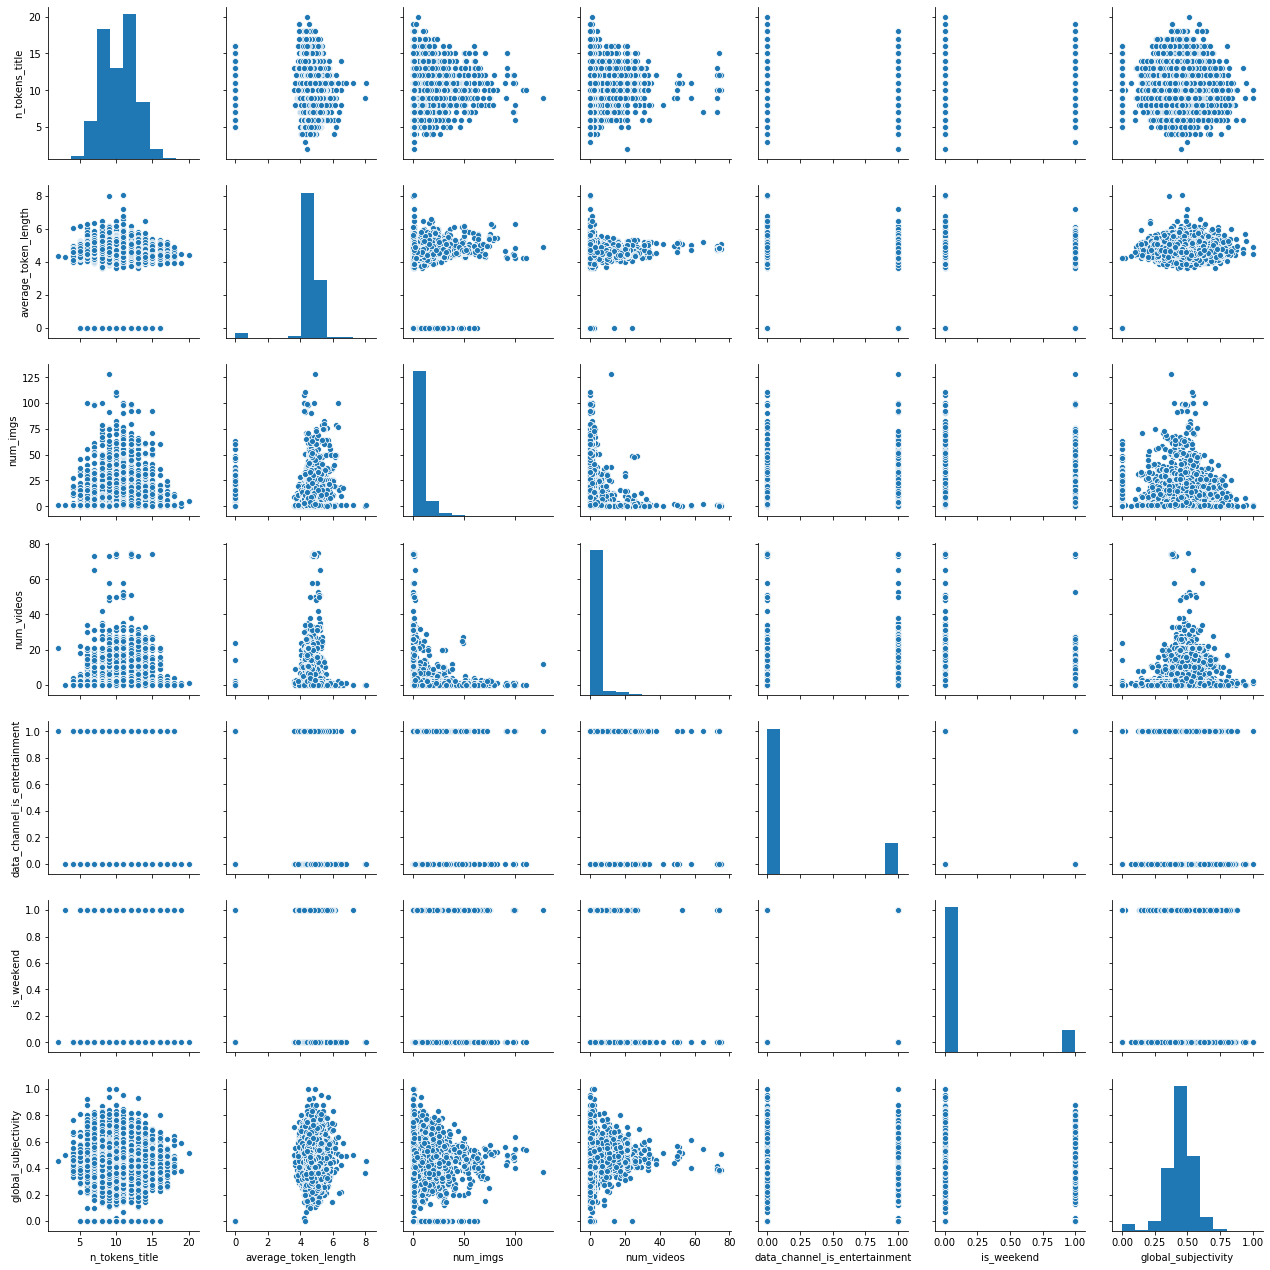

In [5]:
df_sub = df[['n_tokens_title', 'average_token_length', 'num_imgs', 'num_videos', 'data_channel_is_entertainment','is_weekend', 'global_subjectivity']]
sns.pairplot(df_sub)
plt.show()

Selecting 5 variables and index them based id

In [6]:
x = df[['n_tokens_title', 'average_token_length', 'num_imgs', 'num_videos', 'data_channel_is_entertainment','is_weekend', 'global_subjectivity']]
y = df['shares_log']
x.index = df['id']
y.index = df['id']
x.head()
y.head()

id
1    3.322219
2    2.437751
3    3.176091
4    3.301030
5    3.778151
Name: shares_log, dtype: float64

# Split the dataset
Splitting dataset to training 80% and testing 20%

In [7]:
df_len = len(df.index)
df_tr_len = round(len(df.index)*80/100) #80% of data
df_test_len = len(df.index)-round(len(df.index)*80/100)

x_train = x.iloc[:df_tr_len]
y_train = y.iloc[:df_tr_len]

x_test = x.iloc[df_test_len:df_len]
y_test = y.iloc[df_test_len:df_len]

# linear regression model
Fit a linear regression model to predict the number of shares (using the training data. Give the equation of the model (please use Markdown formulas)

In [8]:
lm = LinearRegression() #Linear Regression model
lm.fit(x_train, y_train) #fiting model

b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept

print(f"The regression line is equal to y = {b0:.4f} + {b1:.4f}X") #.0f formats to 4 decimals.

The regression line is equal to y = 3.2853 + 0.0006X


# Predictive power of the model R2

In [75]:
y_testP = lm.predict(x_test)#The model R2
print("R2:", r2_score(y_test, y_testP))

R2: 0.03583077487872843


In [76]:
df['y_testP'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(50)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log,y_test_p,y_testP
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219,3.277458,3.277458
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751,3.209336,3.209336
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091,3.273532,3.273532
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030,3.198843,3.198843
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151,3.322194,3.322194
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181,3.224924,3.224924
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068,3.391729,3.391729
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091,3.219532,3.219532
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.491362,3.239533,3.239533
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,0,1,0.417229,0.183895,0.166667,0.000000,27300,4.436163,3.354486,3.354486


# Investigate the residuals

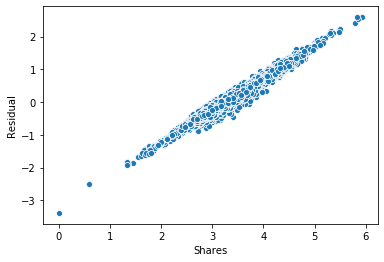

In [77]:
Residual = y_test - y_testP
sns.scatterplot(y_test, resid)
plt.xlabel('Shares')
plt.ylabel('Residual')
plt.show()

# Evaluating the model

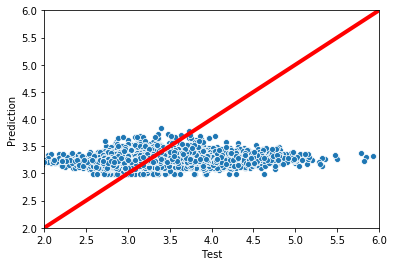

In [79]:
sns.scatterplot(y_test, y_testP)
plt.xlim([2, 6]) 
plt.ylim([2, 6])
plt.plot([2, 6], [2, 6], color='red', lw=4) #The diagonal len
plt.xlabel('Test')
plt.ylabel('Prediction')
plt.show()